# DYU Text mining workshop

In [1]:
# !pip install pandas
# !pip install seaborn
# !pip install jieba
# !pip install wordcloud
# !pip install jiagu
# !pip install opencc-python-reimplemented

## Import packages

In [6]:
import requests
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['axes.unicode_minus']=False

import jieba
import wordcloud 

import jiagu
from opencc import OpenCC

## Udn news

### Step1: Request

In [17]:
url = 'https://udn.com/api/more?page=700&id=search:台積電&channelId=2&type=searchword'
resp = requests.get(url)
resp.json()

{'state': True,
 'page': 700,
 'end': True,
 'lists': [{'url': 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2014/07/29/99/126998.jpg',
   'titleLink': 'https://fund.udn.com/fund/story/5879/175767',
   'title': '基金facebook／鐘國忠投資三心法 搶賺龍年財',
   'paragraph': '【經濟日報╱文／魏興中】台股兔年封關。回顧過去、展望未來，日盛投顧分析師鐘國忠認為，龍年台股行情雖不看淡，但由於外在不確定性變因增加，使操作難度明顯提升，不過，秉持「投資目的、慎選老闆、景氣燈號」三...',
   'cateLink': 'https://fund.udn.com',
   'cateTitle': '基金',
   'time': {'dateTime': '2012-01-30 00:00:00', 'date': '2012-01-30 00:00:00'}},
  {'url': 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2014/07/29/99/126900.jpg',
   'titleLink': 'https://fund.udn.com/fund/story/5879/175628',
   'title': '基金facebook／陸行之 努力+努力 唯一心法',
   'paragraph': '【經濟日報╱文／溫建勳】巴克萊證券亞太半導體首席分析師陸行之，在外資圈素有「半導體一哥」的美名，甚至有人慕名而到巴克萊工作，希望從他身上學習如何成為研究產業的頂尖高手。但對他而言，化繁為簡的心法是：...',
   'cateLink': 'https://fund.udn.com',
   'cateTitle': '基金',
   'time': {'dateTime': '2012-01-16 00:00:00', 'date': '2012-01-16 00:00:00'}},
  {'u

### Step2: To DataFrame

In [18]:
url = 'https://udn.com/api/more?page=700&id=search:台積電&channelId=2&type=searchword'
resp = requests.get(url)
pd.DataFrame(resp.json()['lists'])

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://fund.udn.com/fund/story/5879/175767,基金facebook／鐘國忠投資三心法 搶賺龍年財,【經濟日報╱文／魏興中】台股兔年封關。回顧過去、展望未來，日盛投顧分析師鐘國忠認為，龍年台股...,https://fund.udn.com,基金,"{'dateTime': '2012-01-30 00:00:00', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://fund.udn.com/fund/story/5879/175628,基金facebook／陸行之 努力+努力 唯一心法,【經濟日報╱文／溫建勳】巴克萊證券亞太半導體首席分析師陸行之，在外資圈素有「半導體一哥」的美...,https://fund.udn.com,基金,"{'dateTime': '2012-01-16 00:00:00', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/6032/357828,台積電員工「享瘦」 10周減20公斤,【聯合報╱記者周宗禎／台南報導】 台積電南科廠區上萬員工有4成過胖，廠方警覺辦「健康享瘦營」...,https://health.udn.com,元氣網,"{'dateTime': '2011-11-26 00:00:00', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5964/355750,哪家公司午覺時間最長、哪家又可玩社團？,【元氣周報／記者薛翔之、賴昭穎、孫中英、朱婉寧、羅介妤、黃郁文／報導】上班族中午休息時間，有...,https://health.udn.com,元氣網,"{'dateTime': '2011-08-15 00:00:00', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/351111,爆肝族：終於有保障了,【聯合報╱記者李青霖／新竹市報導】「真的嗎？太好了！」科技業「爆肝」多，新竹科學園區一名半導...,https://health.udn.com,元氣網,"{'dateTime': '2010-12-23 00:00:00', 'date': '2..."
5,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/351113,過勞死標準放寬 新增四項疾病認定,【聯合報╱記者湯雅雯、李青霖／台北—新竹連線報導】 高科技業常以「責任制」為由，未保留員工出...,https://health.udn.com,元氣網,"{'dateTime': '2010-12-23 00:00:00', 'date': '2..."
6,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/221292,曹興誠：兒不接班 不辦豪門婚禮,【聯合報╱記者何醒邦／台北報導】 六十三歲聯電榮譽董事長曹興誠昨天接受電視專訪，談到敏...,https://theme.udn.com,時事話題,"{'dateTime': '2010-04-10 00:00:00', 'date': '2..."
7,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/344702,止痛晶片 刷一下3個月不痛,【聯合晚報／記者王彩鸝／台北報導】一片十元大小的晶片植入腰部，身體疼痛時，只要用結合手機的感...,https://health.udn.com,元氣網,"{'dateTime': '2009-11-25 00:00:00', 'date': '2..."
8,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6404/220445,「經營」公益變獨大 就危險了,【聯合報/記者張錦弘、陳惠惠、 鄭朝陽、梁玉芳】問：你們當志工導正一些不幸家庭的孩子，最擔心...,https://theme.udn.com,時事話題,"{'dateTime': '2008-11-03 00:00:00', 'date': '2..."
9,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220959,郭媽：我要馨瑩當女兒,【聯合報╱記者鄒秀明／台北報導】 鴻海董事長郭台銘與曾馨瑩昨晚舉辦婚宴，君悅飯店大廳用紅色...,https://theme.udn.com,時事話題,"{'dateTime': '2008-07-30 00:00:00', 'date': '2..."


### Step3: Loop

In [20]:
for page in range(1, 10):
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword


### Step4: Concat

In [22]:
df = []
for page in range(1, 10):
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)
    resp = requests.get(url)
    ndf = pd.DataFrame(resp.json()['lists'])
    df.append(ndf)
df = pd.concat(df, ignore_index=True)
df

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword


,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5871785,美國股市再創新高！基建法過關加添柴火 下周焉能不漲,美國股市周五再創歷史最高水準，由於美國10月就業數字強勁，加上輝瑞新冠口服藥成效顯著，激勵凡...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-06 18:21:08', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7326/5871010,台南就業旺！新營就博會5380職缺 三井outlet19日徵才,台南市政府今年最後一場大型徵才活動「台南好生活 台南呷頭路」就業博覽會，今在新營體育場外廣場...,https://udn.com/news/cate/6641,地方,"{'dateTime': '2021-11-06 11:44:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870997,劉揚偉：美缺半導體基礎設施 估設廠成本較中國翻倍,鴻海（2317）董事長劉揚偉今日席在線上舉辦的2021美台高科技論壇，回應外界提問指出，美國...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:41:10', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870903,重返母校淡江 陳進財：逆境才是人可以成長的環境,穩懋（3105）暨聯茂（6213）董事長陳進財今日重返母校淡江並獲授予名譽博士學位，他演講並...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:03:11', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870807,劉揚偉：美國缺半導體基礎設施 設廠成本可能翻倍,鴻海董事長劉揚偉今天出席在線上舉辦的2021美台高科技論壇時表示，美國缺乏半導體基礎設施，設...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 10:04:41', 'date': '2..."
...,...,...,...,...,...,...,...
175,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7238/5856502,【財經展望周報】英特爾新處理器上市挑戰台積電／10月消費者物價指數能否下降？,美國晶片大廠英特爾（Intel）改變過去針對桌上型電電腦和筆電分開設計不同處理器後，推出全新...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-01 08:02:00', 'date': '2..."
176,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5857429,今天開盤前 五件國際事不可不知,美國股市上周五（29日）擺脫蘋果和亞馬遜財報利空的影響，尾盤由黑翻紅，三大指數同創歷史新高，...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-01 06:56:07', 'date': '2..."
177,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7241/5857196,投資生醫／陳華鍵：精準醫療 磁吸聰明錢,生技產業五花八門，但聰明錢已悄悄看上「精準醫療」領域，例如專責「數據產生」的美國生技公司iI...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-01 02:54:12', 'date': '2..."
178,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5857190,台股突圍 基本面當靠山,台股近來雖高檔承壓，不過隨美股道瓊等指數再創歷史新高，加上預期上市櫃10月營收將亮麗可期，市...,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-01 01:09:21', 'date': '2..."


In [24]:
ndf.shape[0]

20

### Step5: While loop

In [135]:
df = []
page = 1
while True:
    try:
        url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
        print(url)
        resp = requests.get(url)
        ndf = pd.DataFrame(resp.json()['lists'])
        df.append(ndf)
        page = page+1
    except:
        print('Error and retry.')
    if ndf.shape[0] < 20:
        break
df = pd.concat(df, ignore_index=True)
df

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=10&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=11&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=12&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=13&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=14&i

In [3]:
# df

### Step6: Save data

In [27]:
df.to_pickle('udnnews.pkl')
df.to_csv('udnnews.csv')
df.to_excel('udnnews.csv')

## TWSE

In [68]:
df = []
rs = requests.Session()
ymlist = pd.date_range(start='2010-01-01', end='2021-11-01', freq='MS')
for yyyymmdd in ymlist:
    ymd = yyyymmdd.strftime('%Y%m%d')
    url = f"https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date={ymd}&stockNo=2330"
    print(url)
    resp = rs.get(url)
    ndf = pd.DataFrame(data = resp.json()['data'],
                       columns=resp.json()['fields'])
    ndf['title'] = resp.json()['title']
    df.append(ndf)
    time.sleep(3)
df = pd.concat(df, ignore_index=True)
df

https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100101&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100201&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100301&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100401&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100501&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100601&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100701&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100801&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20100901&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20101001&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date

,Date,Trade Volume,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Transaction,title
0,2010/01/04,"39,511,138","2,557,720,928",65.00,65.00,64.00,64.90,+0.40,"8,255",2010/01 Daily Trading Value/Volume of 2330
1,2010/01/05,"38,394,084","2,464,115,096",65.00,65.10,63.90,64.50,-0.40,"9,205",2010/01 Daily Trading Value/Volume of 2330
2,2010/01/06,"52,734,385","3,390,698,544",64.50,64.90,63.70,64.90,+0.40,"12,597",2010/01 Daily Trading Value/Volume of 2330
3,2010/01/07,"53,294,614","3,437,221,996",64.90,65.00,64.20,64.20,-0.70,"11,195",2010/01 Daily Trading Value/Volume of 2330
4,2010/01/08,"48,047,497","3,068,341,466",63.50,64.30,63.50,64.00,-0.20,"9,804",2010/01 Daily Trading Value/Volume of 2330
...,...,...,...,...,...,...,...,...,...,...
2910,2021/11/01,"17,110,357","10,107,402,871",591.00,593.00,590.00,590.00,0.00,"13,798",2021/11 Daily Trading Value/Volume of 2330
2911,2021/11/02,"16,544,999","9,808,608,554",594.00,597.00,590.00,592.00,+2.00,"11,662",2021/11 Daily Trading Value/Volume of 2330
2912,2021/11/03,"11,404,984","6,773,439,607",597.00,597.00,592.00,592.00,0.00,"8,934",2021/11 Daily Trading Value/Volume of 2330
2913,2021/11/04,"18,888,245","11,112,246,412",592.00,594.00,585.00,587.00,-5.00,"22,171",2021/11 Daily Trading Value/Volume of 2330


In [70]:
df.to_pickle('twse_2330.pkl')

## Vis
- 可以照新聞類型來視覺化

### Vis1: udnnews counts by category 

In [7]:
udnnews = pd.read_pickle('./udnnews.pkl')
udnnews.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872172,「共好」策略下的成功契機,【作者： 季平】安永諮詢服務股份有限公司（EY）一項針對400多位董事級以上經理人調查指出，...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:55', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872270,如何因應疫後的生態系變局：電子產業的挑戰與機會,【作者： 盧傑瑞】2020年是世界歷史上獨一無二的一年。全球自2019年受到新冠肺炎(COV...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:54', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5873993,台股開盤上漲26點 台積電開平盤,"台股今(8)日開盤上漲26.49點，開盤指數17,323.39點；台積電（2330）開出平盤...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:04:13', 'date': '2..."


<AxesSubplot:xlabel='index', ylabel='cnt'>

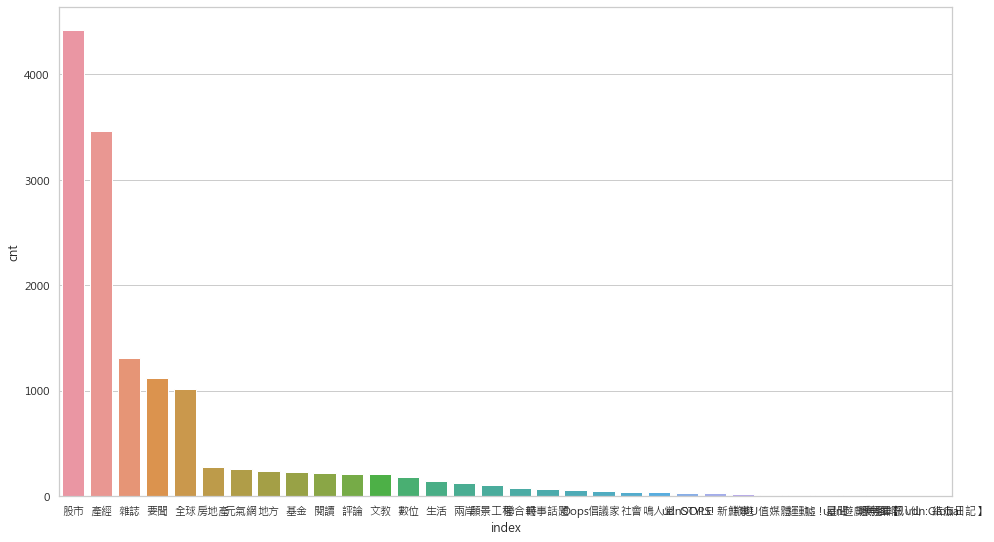

In [8]:
udnnews = pd.read_pickle('./udnnews.pkl')
barplot_data = udnnews['cateTitle'].value_counts()
barplot_data = barplot_data.reset_index(name='cnt')

plt.figure(figsize=(16,9))
sns.barplot(x='index', y='cnt', data=barplot_data)

### Vis2: udnnews counts by date 

In [45]:
udnnews = pd.read_pickle('./udnnews.pkl')
udnnews['Date'] = udnnews['time'].apply(lambda x: x['dateTime'])
udnnews['Date'] = udnnews['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d'))
udnnews = udnnews.loc[udnnews['Date'].apply(lambda x: x >= '2020-01-01')]
udnnews = udnnews.loc[udnnews['cateTitle'].apply(lambda x: x in ['股市','產經','雜誌','全球'])]
udnnews.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time,Date
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872172,「共好」策略下的成功契機,【作者： 季平】安永諮詢服務股份有限公司（EY）一項針對400多位董事級以上經理人調查指出，...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:55', 'date': '2...",2021-11-08
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872270,如何因應疫後的生態系變局：電子產業的挑戰與機會,【作者： 盧傑瑞】2020年是世界歷史上獨一無二的一年。全球自2019年受到新冠肺炎(COV...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:54', 'date': '2...",2021-11-08
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5873993,台股開盤上漲26點 台積電開平盤,"台股今(8)日開盤上漲26.49點，開盤指數17,323.39點；台積電（2330）開出平盤...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:04:13', 'date': '2...",2021-11-08


<AxesSubplot:xlabel='Date', ylabel='cnt'>

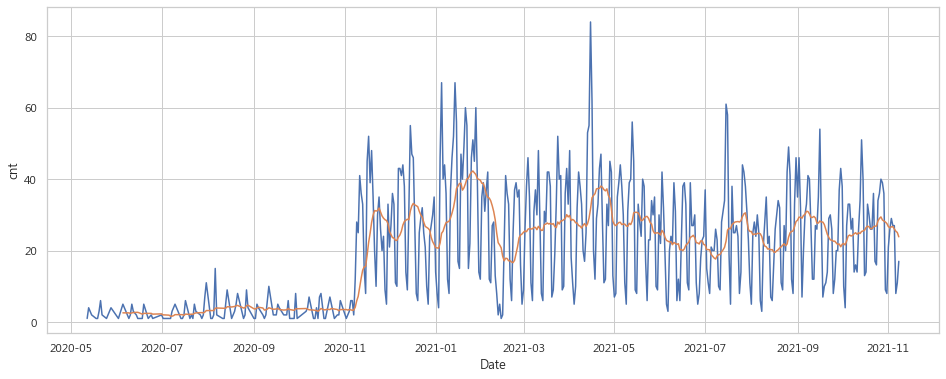

In [55]:
plotdf1 = udnnews.groupby('Date').size().reset_index(name='cnt')
plotdf1['Date'] = plotdf1['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

plotdf1['r14_newscnt'] = plotdf1['cnt'].rolling(window=14).mean()

# plotdf1['newscnt_minus_r14cnt'] = plotdf1['cnt'] - plotdf1['r14_newscnt']
plt.figure(figsize=(16,6))
sns.lineplot(x='Date', y='cnt', data=plotdf1)  
sns.lineplot(x='Date', y='r14_newscnt', data=plotdf1)      

In [47]:
plotdf1['r3_cnt'] = plotdf1['cnt'].rolling(window=3).sum()
plotdf1.loc[:,['Date', 'cnt', 'r3_cnt']].head(10)

,Date,cnt,r3_cnt
0,2020-05-12,1,NaN
1,2020-05-13,4,NaN
2,2020-05-14,3,8.0
3,2020-05-15,2,9.0
4,2020-05-18,1,6.0
5,2020-05-19,1,4.0
6,2020-05-20,3,5.0
7,2020-05-21,6,10.0
8,2020-05-22,2,11.0
9,2020-05-25,1,9.0


### Vis3: tsmc closed price by date

<AxesSubplot:xlabel='Date', ylabel='Closing Price'>

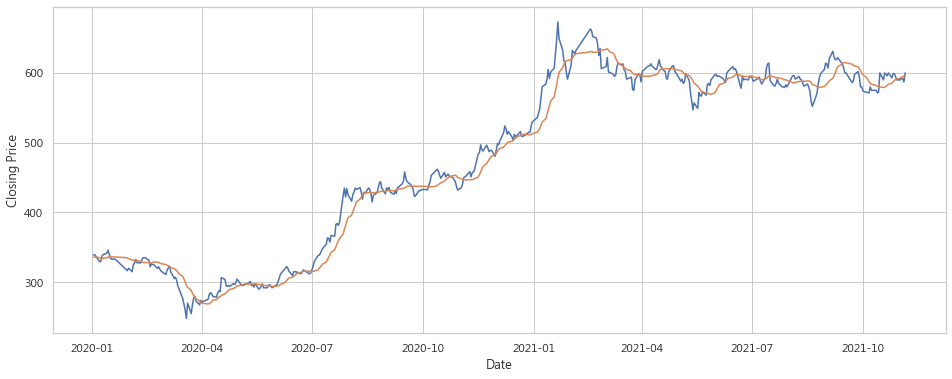

In [54]:
tsmc = pd.read_pickle('./twse_2330.pkl')

tsmc['Date'] = tsmc['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d').strftime('%Y-%m-%d'))

tsmc['Closing Price'] = tsmc['Closing Price'].apply(lambda x: float(x))
tsmc['r14_ClosingPrice'] = tsmc['Closing Price'].rolling(window=14).mean()

tsmc = tsmc.loc[tsmc['Date'].apply(lambda x: x >= '2020-01-01')]
tsmc['Date'] = tsmc['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

plt.figure(figsize=(16,6))
sns.lineplot(x='Date', y='Closing Price', data=tsmc)  
sns.lineplot(x='Date', y='r14_ClosingPrice', data=tsmc)  

### Vis4: News volumn and tsmc closed price by date
- 每次波動(含正/負都會伴隨一些新聞聲量

No handles with labels found to put in legend.


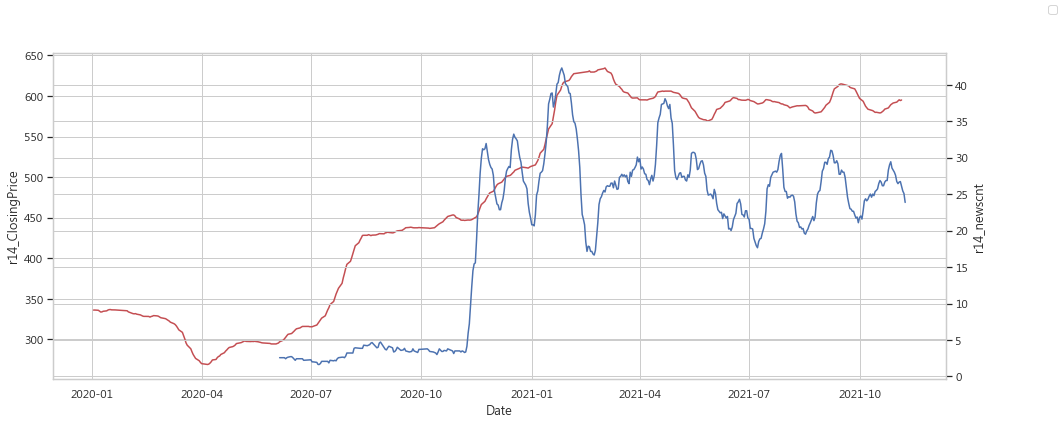

In [53]:

plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Date', y='r14_ClosingPrice', data=tsmc, color="r" )   
ax2 = ax.twinx()
sns.lineplot(x='Date', y='r14_newscnt', data=plotdf1, ax=ax2, color="b" ,)   
ax.figure.legend()

In [39]:
tsmc

,Date,Trade Volume,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Transaction,title,r14_ClosingPrice
2465,2020-01-02,"33,282,120","11,224,165,450",332.50,339.00,332.50,339.0,+8.00,"17,160",2020/01 Daily Trading Value/Volume of 2330,335.928571
2466,2020-01-03,"42,023,268","14,295,651,580",344.00,345.00,335.50,339.5,+0.50,"20,545",2020/01 Daily Trading Value/Volume of 2330,335.964286
2467,2020-01-06,"45,677,057","15,210,531,318",333.00,334.50,332.00,332.0,-7.50,"22,944",2020/01 Daily Trading Value/Volume of 2330,335.678571
2468,2020-01-07,"51,746,181","17,053,282,011",332.50,333.00,326.50,329.5,-2.50,"22,362",2020/01 Daily Trading Value/Volume of 2330,334.571429
2469,2020-01-08,"37,913,748","12,484,410,088",325.00,333.00,325.00,329.5,0.00,"18,228",2020/01 Daily Trading Value/Volume of 2330,333.500000
...,...,...,...,...,...,...,...,...,...,...,...
2910,2021-11-01,"17,110,357","10,107,402,871",591.00,593.00,590.00,590.0,0.00,"13,798",2021/11 Daily Trading Value/Volume of 2330,592.428571
2911,2021-11-02,"16,544,999","9,808,608,554",594.00,597.00,590.00,592.0,+2.00,"11,662",2021/11 Daily Trading Value/Volume of 2330,593.928571
2912,2021-11-03,"11,404,984","6,773,439,607",597.00,597.00,592.00,592.0,0.00,"8,934",2021/11 Daily Trading Value/Volume of 2330,595.285714
2913,2021-11-04,"18,888,245","11,112,246,412",592.00,594.00,585.00,587.0,-5.00,"22,171",2021/11 Daily Trading Value/Volume of 2330,594.357143


In [129]:
# tsmc['L1D_CLOSED'] = tsmc['Closing Price'].shift(1)
# tsmc.loc[:,['Date', 'Closing Price', 'L1D_CLOSED']]

No handles with labels found to put in legend.


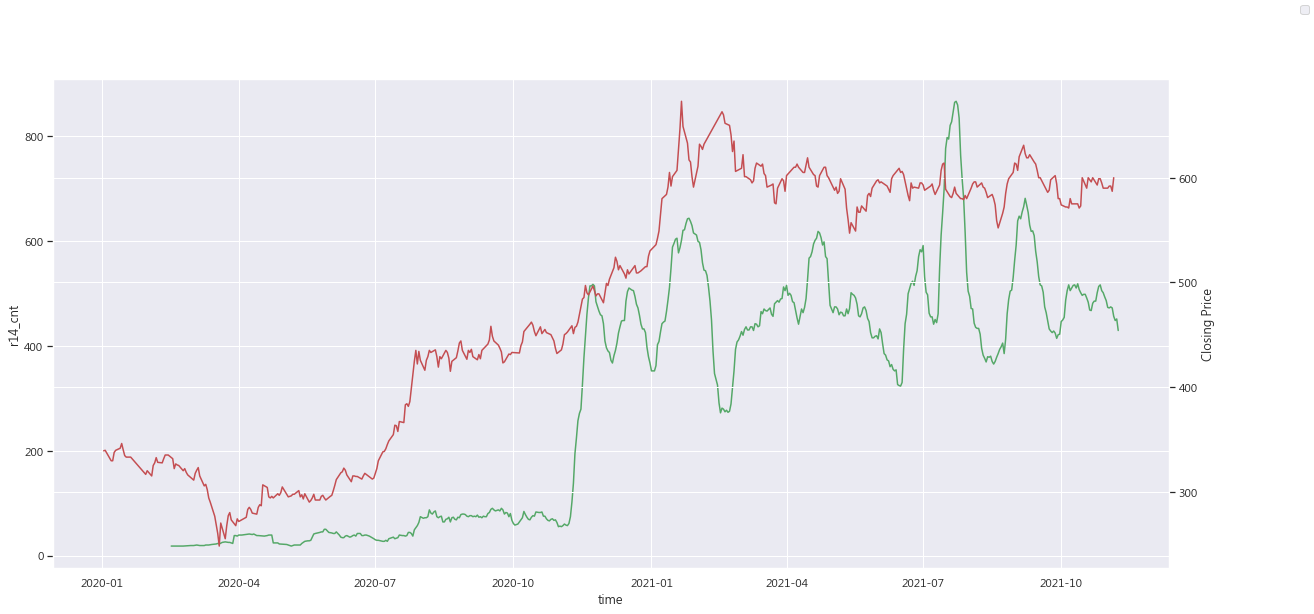

In [99]:
plt.figure(figsize=(20,9))
ax = sns.lineplot(x='time', y='r14_cnt', data=plotdf1, color="g" )   
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Closing Price', data=tsmc, ax=ax2, color="r" )   
ax.figure.legend()

### Vis5: Word Cloud by condiction
- 文字雲除了漂亮之外，能提供的資訊其實很有限qq
- 但還是能看到一些正負向的情緒詞彙

In [61]:
tsmc['price_minus_r14price'] = tsmc['Closing Price'] - tsmc['r14_ClosingPrice']
tsmc['Date'] = tsmc['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

wcdf = pd.merge(left=udnnews.loc[:,['title','paragraph','Date']],
                right=tsmc.loc[:,['Date','Closing Price','r14_ClosingPrice', 'price_minus_r14price']],
                how='inner',
                on='Date')
wcdf.head()

,title,paragraph,Date,Closing Price,r14_ClosingPrice,price_minus_r14price
0,進台積電2個月後悔！他崩潰喊「好憂鬱」 內行勸：瘋掉前快走,科技業的平均薪資比大多數產業高出不少，令許多民眾相當嚮往，其中，若能進入有「護國神山」之稱的...,2021-11-05,600.0,595.071429,4.928571
1,為保護自家機密 路透：南韓晶片業者提交予美報告將省略細節,知情人士透露，三星電子與SK海力士提交給美國的全球晶片供應鏈報告，將不會包含詳細資訊，以保護...,2021-11-05,600.0,595.071429,4.928571
2,10月外匯存底連三月創新高 維持全球第五大,我國外匯存底持續締造新猷。多數非美貨幣對美元升值，加上外匯存底投資運用收益入帳兩大因素，中央...,2021-11-05,600.0,595.071429,4.928571
3,台灣10月外匯存底升至5467億美元 續創歷史新高,中央銀行今天公布10月底台灣外匯存底金額為5467.01億美元，較9月底增加18.02億美元...,2021-11-05,600.0,595.071429,4.928571
4,IC設計躺賺時代結束 Q4搶發新品明年見真章？,集微網消息，隨著部分需求端出現鬆動，第四季度起IC設計廠業績將迎來差異化走勢，在此背景下，各...,2021-11-05,600.0,595.071429,4.928571


In [70]:
words = ['台積電', '後悔', '報告', '三大法人', '英特爾','八年級', '少主', '公開', '脫鉤', '新冠', '過後', '生態', '台大', '清大', '半導體',
        '長榮', '擠下', '台股', '台指期' , '收盤' , '上漲', '大關', '稱霸', '謝金河', '成長', '黃捷', '開徵', '囤房稅', '陳其邁']
for word in words:
    jieba.add_word(word)

In [71]:
wcdf['seg'] = wcdf['title'].apply(lambda x: ' '.join(jieba.lcut(x)))
wcdf

,title,paragraph,Date,Closing Price,r14_ClosingPrice,price_minus_r14price,seg
0,進台積電2個月後悔！他崩潰喊「好憂鬱」 內行勸：瘋掉前快走,科技業的平均薪資比大多數產業高出不少，令許多民眾相當嚮往，其中，若能進入有「護國神山」之稱的...,2021-11-05,600.0,595.071429,4.928571,進 台積電 2 個 月 後悔 ！ 他 崩潰 喊 「 好憂鬱 」 內行 勸 ： 瘋掉 前 快 走
1,為保護自家機密 路透：南韓晶片業者提交予美報告將省略細節,知情人士透露，三星電子與SK海力士提交給美國的全球晶片供應鏈報告，將不會包含詳細資訊，以保護...,2021-11-05,600.0,595.071429,4.928571,為 保護 自家 機密 路透 ： 南韓 晶片 業者 提交 予美 報告 將 省略 細節
2,10月外匯存底連三月創新高 維持全球第五大,我國外匯存底持續締造新猷。多數非美貨幣對美元升值，加上外匯存底投資運用收益入帳兩大因素，中央...,2021-11-05,600.0,595.071429,4.928571,10 月 外匯 存底 連 三月 創 新高 維持 全球 第五 大
3,台灣10月外匯存底升至5467億美元 續創歷史新高,中央銀行今天公布10月底台灣外匯存底金額為5467.01億美元，較9月底增加18.02億美元...,2021-11-05,600.0,595.071429,4.928571,台灣 10 月 外匯 存底 升至 5467 億 美元 續創 歷史 新高
4,IC設計躺賺時代結束 Q4搶發新品明年見真章？,集微網消息，隨著部分需求端出現鬆動，第四季度起IC設計廠業績將迎來差異化走勢，在此背景下，各...,2021-11-05,600.0,595.071429,4.928571,IC 設計 躺 賺 時代 結束 Q4 搶發 新品 明年 見 真章 ？
...,...,...,...,...,...,...,...
8838,5G降臨 數位轉型／5G狂飆 智慧未來,"【撰文／陳怡如】歡迎來到歷史的轉捩點！隨著臺灣第一波5G頻譜拍賣，以1,380億元結標，正式...",2020-05-13,297.0,297.285714,-0.285714,5G 降臨 數位 轉型 ／ 5G 狂飆 智慧 未來
8839,5G降臨 數位轉型／企業專網 打造產業新藍海,【撰文／趙心寧】行政院日前拍板定案，將在2021至2022年間，釋出4.8GHz到4.9GH...,2020-05-13,297.0,297.285714,-0.285714,5G 降臨 數位 轉型 ／ 企業 專網 打造 產業 新 藍海
8840,5G降臨 數位轉型／企業專網及硬體供應鏈 ICT大放異彩,【撰文／廖珮君】高速傳輸可說是5G最有感的魅力所在，加上低延遲、廣連結／大數據等特性，賦予許...,2020-05-13,297.0,297.285714,-0.285714,5G 降臨 數位 轉型 ／ 企業 專網 及 硬 體供 應鏈 ICT 大放 異彩
8841,未曾喝過洋墨水 這位八年級生如何讓臉書、谷歌、台積電爭相網羅？,【文 / 黃亞琪】一隻病毒，打亂了所有的節奏。可是，能將危機化為轉機的企業，會在最低谷時，大...,2020-05-13,297.0,297.285714,-0.285714,未曾 喝過 洋墨水 這位 八年級 生 如何 讓 臉書 、 谷歌 、 台積電 爭相 網羅 ？


In [72]:
stop_words = ['在', '再', '年', '月', '日', '點', '了', '要','會', '有','看','台','都','與','元','中','的','嗎','從','仍','對','和','到',
             '也','可','第','誰','說','讓','他','是']

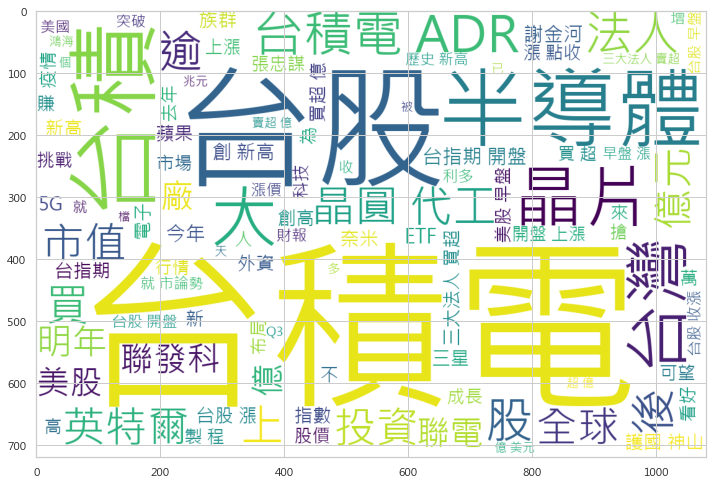

In [73]:
plt.figure(figsize=(12,9))
pos_news = ' '.join(wcdf.loc[wcdf['price_minus_r14price']>10]['seg'])
wc = wordcloud.WordCloud(background_color='white',
                         # margin=2, # 文字間距
                         font_path='./dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', # 設定字體
                         max_words=100, # 取多少文字在裡面
                         width=1080, 
                         height=720, # 長寬解析度
                         stopwords = stop_words
                         )
wc.generate_from_text(pos_news)
plt.imshow(wc)

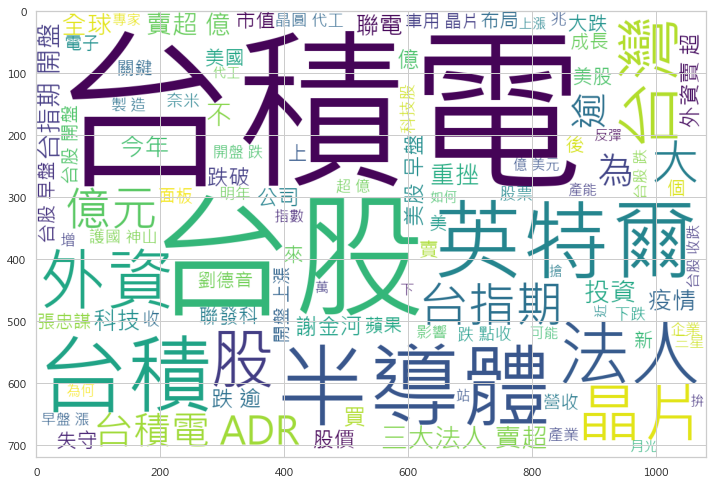

In [74]:
plt.figure(figsize=(12,9))
pos_news = ' '.join(wcdf.loc[wcdf['price_minus_r14price']<-10]['seg'])
wc = wordcloud.WordCloud(background_color='white',
                         # margin=2, # 文字間距
                         font_path='./dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', # 設定字體
                         max_words=100, # 取多少文字在裡面
                         width=1080, 
                         height=720, # 長寬解析度
                         stopwords = stop_words
                         )
wc.generate_from_text(pos_news)
plt.imshow(wc)

### Vis 6

In [83]:
plotdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   475 non-null    datetime64[ns]
 1   cnt                    462 non-null    float64       
 2   r14_newscnt            462 non-null    float64       
 3   cnt_minus_r14_newscnt  462 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.0 KB


In [87]:
# plotdf1['cnt_minus_r14_newscnt'] = plotdf1['cnt'] = plotdf1['r14_newscnt']
# plotdf1['Date'] = plotdf1['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 

# plot_df2 = pd.merge(left=tsmc.loc[:, ['Date', 'price_minus_r14price']], 
#                     right=plotdf1.loc[:, ['Date', 'cnt_minus_r14_newscnt']],
#                     how='left',
#                     on='Date')

In [88]:
plot_df2

,Date,price_minus_r14price,cnt_minus_r14_newscnt
0,2020-01-02,3.071429,NaN
1,2020-01-03,3.535714,NaN
2,2020-01-06,-3.678571,NaN
3,2020-01-07,-5.071429,NaN
4,2020-01-08,-4.000000,NaN
...,...,...,...
445,2021-11-01,-2.428571,26.714286
446,2021-11-02,-1.928571,26.428571
447,2021-11-03,-3.285714,26.642857
448,2021-11-04,-7.357143,26.714286


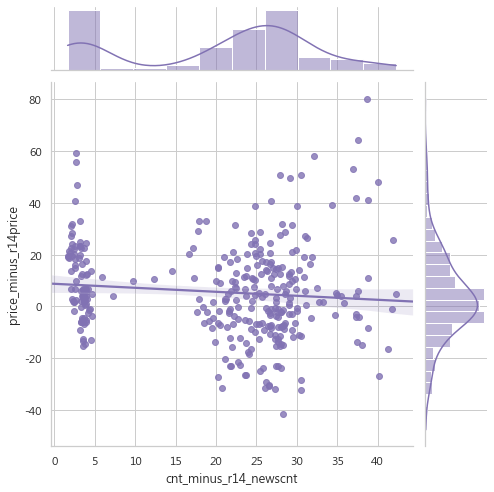

In [89]:
sns.jointplot(x="cnt_minus_r14_newscnt",
              y="price_minus_r14price",
              data=plot_df2,
              kind="reg",
              truncate=False,
              color="m", height=7)

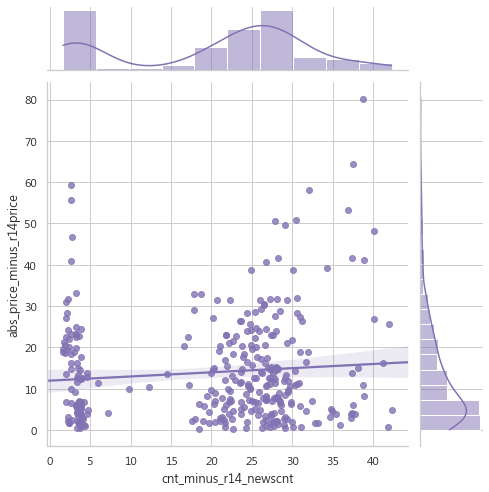

In [90]:
plot_df2['abs_price_minus_r14price'] = plot_df2['price_minus_r14price'].apply(lambda x: abs(x))
sns.jointplot(x="cnt_minus_r14_newscnt",
              y="abs_price_minus_r14price",
              data=plot_df2,
              kind="reg",
              truncate=False,
              color="m", height=7)

In [91]:
plot_df2.corr()

,price_minus_r14price,cnt_minus_r14_newscnt,abs_price_minus_r14price
price_minus_r14price,1.000000,-0.099013,0.423213
cnt_minus_r14_newscnt,-0.099013,1.000000,0.092558
abs_price_minus_r14price,0.423213,0.092558,1.000000


## NLP

In [235]:
url = 'https://www.wisers.ai/?api=ailab-demo-apilb.wisers.com:8000/senti/api/processtext'
data = {'text' : '幾十年來從沒像此時這麼的風雨飄搖',
        'model' :'dl',
        'output_level' : 'subject',
        'show_scores' :'true'}
resp = requests.post(url, json=data)
resp.json()

{'docid': None,
 'is_successful': True,
 'message': '',
 'overall_res': {'sentiment': -1, 'sentiment_score': 0.29},
 'detail_res': []}

In [276]:
udnnews = pd.read_pickle('./udnnews.pkl')
udnnews.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872172,「共好」策略下的成功契機,【作者： 季平】安永諮詢服務股份有限公司（EY）一項針對400多位董事級以上經理人調查指出，...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:55', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872270,如何因應疫後的生態系變局：電子產業的挑戰與機會,【作者： 盧傑瑞】2020年是世界歷史上獨一無二的一年。全球自2019年受到新冠肺炎(COV...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:54', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5873993,台股開盤上漲26點 台積電開平盤,"台股今(8)日開盤上漲26.49點，開盤指數17,323.39點；台積電（2330）開出平盤...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:04:13', 'date': '2..."


In [288]:
# wiserlab ai
url = 'https://www.wisers.ai/?api=ailab-demo-apilb.wisers.com:8000/senti/api/processtext'
rs = requests.Session()

def senti_score(text):
    data = {'text' : text,
            'model' :'dl',
            'output_level' : 'subject',
            'show_scores' :'true'}
    resp = rs.post(url, json=data)
    # time.sleep(1)
    print(text)
    print(resp.json())
    return resp.json()


In [289]:
udnnews.head(300)['title'].apply(lambda x: senti_score(x))

「共好」策略下的成功契機
{'docid': None, 'is_successful': True, 'message': '', 'overall_res': {'sentiment': 1, 'sentiment_score': 0.97}, 'detail_res': []}
如何因應疫後的生態系變局：電子產業的挑戰與機會
{'docid': None, 'is_successful': True, 'message': '', 'overall_res': {'sentiment': 0, 'sentiment_score': 0.44}, 'detail_res': []}
台股開盤上漲26點 台積電開平盤
{'docid': None, 'is_successful': True, 'message': '', 'overall_res': {'sentiment': 0, 'sentiment_score': 0.51}, 'detail_res': []}
台指期開盤下跌13點 台積電期貨跌2元
{'message': 'API rate limit exceeded'}
富邦期貨：台股有望延續多方反攻號角
{'docid': None, 'is_successful': True, 'message': '', 'overall_res': {'sentiment': 1, 'sentiment_score': 0.87}, 'detail_res': []}
日政府擬修法補貼台積電設廠 日經：最快12月著手
{'docid': None, 'is_successful': True, 'message': '', 'overall_res': {'sentiment': 0, 'sentiment_score': 0.45}, 'detail_res': []}
今天開盤前 五件事不可不知
{'message': 'API rate limit exceeded'}
新聞中的法律／企業須將永續發展納入DNA
{'docid': None, 'is_successful': True, 'message': '', 'overall_res': {'sentiment': 1, 'sentiment_score': 0.97}, 'detail_

0      {'docid': None, 'is_successful': True, 'messag...
1      {'docid': None, 'is_successful': True, 'messag...
2      {'docid': None, 'is_successful': True, 'messag...
3                 {'message': 'API rate limit exceeded'}
4      {'docid': None, 'is_successful': True, 'messag...
                             ...                        
295               {'message': 'API rate limit exceeded'}
296               {'message': 'API rate limit exceeded'}
297               {'message': 'API rate limit exceeded'}
298               {'message': 'API rate limit exceeded'}
299               {'message': 'API rate limit exceeded'}
Name: title, Length: 300, dtype: object

In [290]:
udnnews.head(300)

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872172,「共好」策略下的成功契機,【作者： 季平】安永諮詢服務股份有限公司（EY）一項針對400多位董事級以上經理人調查指出，...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:55', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872270,如何因應疫後的生態系變局：電子產業的挑戰與機會,【作者： 盧傑瑞】2020年是世界歷史上獨一無二的一年。全球自2019年受到新冠肺炎(COV...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:54', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5873993,台股開盤上漲26點 台積電開平盤,"台股今(8)日開盤上漲26.49點，開盤指數17,323.39點；台積電（2330）開出平盤...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:04:13', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7255/5873986,台指期開盤下跌13點 台積電期貨跌2元,"台指期近月合約今(8)日開盤下跌13點，開盤指數17,256點；台積電（2330）期貨近月合...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:02:12', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7255/5873984,富邦期貨：台股有望延續多方反攻號角,美國非農就業新增53萬人優於市場預期的45萬人，前值由19萬人上調至31萬人，失業率也由4....,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:00:15', 'date': '2..."
...,...,...,...,...,...,...,...
295,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5850614,Sony證實 可能加入台積電赴日設廠計畫,Sony集團28日證實，正考慮加入台積電赴日本熊本縣設晶片廠的計畫。日經新聞報導，Sony ...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-10-28 18:08:07', 'date': '2..."
296,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5850453,台積電赴日設廠 日本索尼表明協助方針,日本索尼集團今天表明將協助晶圓代工廠台積電在日本設廠的方針。索尼有意在熊本縣工廠旁取得約21...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-10-28 17:41:31', 'date': '2..."
297,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5850241,明年晶圓代工產值估年增13%續創新高 晶片荒現紓緩跡象,根據TrendForce最新報告指出，在全球電子產品供應鏈出現晶片荒的同時，晶圓代工產能供不...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-10-28 16:13:13', 'date': '2..."
298,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7238/5850153,豪宅探祕》上市櫃老闆、立委、醫界精英富豪都住在這裡,根據《財訊》報導，通膨疑慮加乘台積電設廠效應，沉寂多年的高雄豪宅市場，最近也動了起來。在地建...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-10-28 15:56:12', 'date': '2..."


In [287]:
udnnews['senti_score'] = udnnews.head(10)['title'].apply(lambda x: senti_score(x))

「共好」策略下的成功契機
{'message': 'API rate limit exceeded'}
如何因應疫後的生態系變局：電子產業的挑戰與機會
{'message': 'API rate limit exceeded'}
台股開盤上漲26點 台積電開平盤
{'message': 'API rate limit exceeded'}
台指期開盤下跌13點 台積電期貨跌2元
{'message': 'API rate limit exceeded'}
富邦期貨：台股有望延續多方反攻號角
{'message': 'API rate limit exceeded'}
日政府擬修法補貼台積電設廠 日經：最快12月著手
{'message': 'API rate limit exceeded'}
今天開盤前 五件事不可不知
{'message': 'API rate limit exceeded'}
新聞中的法律／企業須將永續發展納入DNA
{'message': 'API rate limit exceeded'}
尹啟銘／打造供應鏈全球化2.0
{'message': 'API rate limit exceeded'}
誰囤晶片？美問半導體供應鏈…台廠交卷 韓未回覆
{'message': 'API rate limit exceeded'}


0    {'message': 'API rate limit exceeded'}
1    {'message': 'API rate limit exceeded'}
2    {'message': 'API rate limit exceeded'}
3    {'message': 'API rate limit exceeded'}
4    {'message': 'API rate limit exceeded'}
5    {'message': 'API rate limit exceeded'}
6    {'message': 'API rate limit exceeded'}
7    {'message': 'API rate limit exceeded'}
8    {'message': 'API rate limit exceeded'}
9    {'message': 'API rate limit exceeded'}
Name: title, dtype: object

In [ ]:
# snownlp

In [272]:
# jiagu
# cc = OpenCC('t2s')
# udnnews['title_s'] = udnnews['title'].apply(lambda x: cc.convert(x))
# udnnews['sent_score'] =  udnnews['title_s'].apply(lambda x: jiagu.sentiment(x))
# udnnews

,url,titleLink,title,paragraph,cateLink,cateTitle,time,title_s,sent_score
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872172,「共好」策略下的成功契機,【作者： 季平】安永諮詢服務股份有限公司（EY）一項針對400多位董事級以上經理人調查指出，...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:55', 'date': '2...",「共好」策略下的成功契机,"(negative, 0.7028245775439389)"
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872270,如何因應疫後的生態系變局：電子產業的挑戰與機會,【作者： 盧傑瑞】2020年是世界歷史上獨一無二的一年。全球自2019年受到新冠肺炎(COV...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:54', 'date': '2...",如何因应疫后的生态系变局：电子产业的挑战与机会,"(negative, 0.5588861095064966)"
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5873993,台股開盤上漲26點 台積電開平盤,"台股今(8)日開盤上漲26.49點，開盤指數17,323.39點；台積電（2330）開出平盤...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:04:13', 'date': '2...",台股开盘上涨26点 台积电开平盘,"(negative, 0.8005993764267139)"
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7255/5873986,台指期開盤下跌13點 台積電期貨跌2元,"台指期近月合約今(8)日開盤下跌13點，開盤指數17,256點；台積電（2330）期貨近月合...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:02:12', 'date': '2...",台指期开盘下跌13点 台积电期货跌2元,"(negative, 0.8640095690072876)"
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7255/5873984,富邦期貨：台股有望延續多方反攻號角,美國非農就業新增53萬人優於市場預期的45萬人，前值由19萬人上調至31萬人，失業率也由4....,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:00:15', 'date': '2...",富邦期货：台股有望延续多方反攻号角,"(negative, 0.9194743534798693)"
...,...,...,...,...,...,...,...,...,...
13995,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220722,曹興誠 強硬聲明展現擔當,【記者陳令軒】 雙魚座個性的聯電董事長曹興誠，60大壽就在下周。受到蘇州和艦案影響，他挺身...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2...",曹兴诚 强硬声明展现担当,"(negative, 0.636963091290418)"
13996,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220723,"曹興誠,衝勁十足 能賺敢賺",【記者詹惠珠、林宏文/台北】 聯電董事長曹興誠，在半導體業界一向被視為爭議性人物，但談到他...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2...","曹兴诚,冲劲十足 能赚敢赚","(positive, 0.7520165233685466)"
13997,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6441/220700,華碩董座施崇棠 捐台大5.4億,【記者喻文玟／台北報導】華碩電腦董事長、台大電機系校友施崇棠，個人捐五億四千萬元協助台大興建...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-18 00:00:00', 'date': '2...",华硕董座施崇棠 捐台大5.4亿,"(negative, 0.7033975795216391)"
13998,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220693,郭台銘送妻最後一程…,【記者林信昌／台北報導】 鴻海集團總裁郭台銘昨（31）日神情哀淒，送愛妻林淑如最後一程，她將...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-15 00:00:00', 'date': '2...",郭台铭送妻最后一程…,"(positive, 0.5247936115252012)"


In [251]:
resp.json()['overall_res']

{'sentiment': 1, 'sentiment_score': 0.94}

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872172,「共好」策略下的成功契機,【作者： 季平】安永諮詢服務股份有限公司（EY）一項針對400多位董事級以上經理人調查指出，...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:55', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6903/5872270,如何因應疫後的生態系變局：電子產業的挑戰與機會,【作者： 盧傑瑞】2020年是世界歷史上獨一無二的一年。全球自2019年受到新冠肺炎(COV...,https://udn.com/news/cate/1015,雜誌,"{'dateTime': '2021-11-08 09:06:54', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5873993,台股開盤上漲26點 台積電開平盤,"台股今(8)日開盤上漲26.49點，開盤指數17,323.39點；台積電（2330）開出平盤...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:04:13', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7255/5873986,台指期開盤下跌13點 台積電期貨跌2元,"台指期近月合約今(8)日開盤下跌13點，開盤指數17,256點；台積電（2330）期貨近月合...",https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:02:12', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7255/5873984,富邦期貨：台股有望延續多方反攻號角,美國非農就業新增53萬人優於市場預期的45萬人，前值由19萬人上調至31萬人，失業率也由4....,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-08 09:00:15', 'date': '2..."
...,...,...,...,...,...,...,...
13995,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220722,曹興誠 強硬聲明展現擔當,【記者陳令軒】 雙魚座個性的聯電董事長曹興誠，60大壽就在下周。受到蘇州和艦案影響，他挺身...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2..."
13996,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220723,"曹興誠,衝勁十足 能賺敢賺",【記者詹惠珠、林宏文/台北】 聯電董事長曹興誠，在半導體業界一向被視為爭議性人物，但談到他...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2..."
13997,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6441/220700,華碩董座施崇棠 捐台大5.4億,【記者喻文玟／台北報導】華碩電腦董事長、台大電機系校友施崇棠，個人捐五億四千萬元協助台大興建...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-18 00:00:00', 'date': '2..."
13998,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220693,郭台銘送妻最後一程…,【記者林信昌／台北報導】 鴻海集團總裁郭台銘昨（31）日神情哀淒，送愛妻林淑如最後一程，她將...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-15 00:00:00', 'date': '2..."


In [236]:
import requests

url = 'https://www.wisers.ai/?api=ailab-demo-apilb.wisers.com:8000/senti/api/processtext'
data = {'text' : '今年是大豐收，從來沒有這麼開心過',
        'model' :'dl',
        'output_level' : 'subject',
        'show_scores' :'true'}
resp = requests.post(url, json=data)
resp.json()

{'docid': None,
 'is_successful': True,
 'message': '',
 'overall_res': {'sentiment': 1, 'sentiment_score': 0.94},
 'detail_res': []}

('positive', 0.5269453078149887)
